## HR Analytics
#### Let's find out what kind of people tend to look for job changes more.


### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Import data from the csv file.
We can also check out the dataframe using df.info(), df.head(), df.shape

In [2]:
df = pd.read_csv("hr.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

df.shape

### 3. Let's check if there are any null values

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

It seems like there are a lot of null values. Let us drop them all for now. Also, we can call df.drop_duplicates() to remove any duplicates, if there is any

In [5]:
df = df.dropna().drop_duplicates()
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0


### 4. Let's reword the columns for readability

In [6]:
# Clean the column names
df.columns = ["id", "city", "city development index", "gender" , "relevant experience", "university", "education level", "major", "experience", "company size", "company type", "last new job", "training hours", "target"]

df.head()

,id,city,city development index,gender,relevant experience,university,education level,major,experience,company size,company type,last new job,training hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


### 5. Let's also clean a few column data for better readability

In [7]:
# Clean the relevant experience column
df.loc[df["relevant experience"] == "No relevent experience", 'relevant experience'] = "No"
df.loc[df["relevant experience"] == "Has relevent experience", 'relevant experience'] = "Yes"

# Clean the university column
df.loc[df["university"] == "no_enrollment", 'university'] = "None"
df.loc[df["university"] == "Part time course", 'university'] = "Part time"
df.loc[df["university"] == "Full time course", 'university'] = "Full time"

target_df = df
target_df

,id,city,city development index,gender,relevant experience,university,education level,major,experience,company size,company type,last new job,training hours,target
1,29725,city_40,0.776,Male,No,None,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Yes,None,Masters,STEM,>20,50-99,Funded Startup,4,8,0
7,402,city_46,0.762,Male,Yes,None,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Yes,None,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
11,23853,city_103,0.920,Male,Yes,None,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No,Full time,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1
19149,251,city_103,0.920,Male,Yes,None,Masters,STEM,9,50-99,Pvt Ltd,1,36,1
19150,32313,city_160,0.920,Female,Yes,None,Graduate,STEM,10,100-500,Public Sector,3,23,0
19152,29754,city_103,0.920,Female,Yes,None,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0


### 6. In this HR Analytics problem, we only want to consider the education level, experience, and training hours. Thus, we will be removing any irrelevant columns.

In [8]:
target_df = target_df.drop(columns=["id", "city", "city development index", "company size", "company type", "last new job"])
target_df

,gender,relevant experience,university,education level,major,experience,training hours,target
1,Male,No,None,Graduate,STEM,15,47,0
4,Male,Yes,None,Masters,STEM,>20,8,0
7,Male,Yes,None,Graduate,STEM,13,18,1
8,Male,Yes,None,Graduate,STEM,7,46,1
11,Male,Yes,None,Graduate,STEM,5,108,0
...,...,...,...,...,...,...,...,...
19147,Male,No,Full time,Graduate,STEM,1,52,1
19149,Male,Yes,None,Masters,STEM,9,36,1
19150,Female,Yes,None,Graduate,STEM,10,23,0
19152,Female,Yes,None,Graduate,Humanities,7,25,0


### 7. We wil reset the index for cleaner data

In [9]:
# Reset index
target_df = target_df.reset_index(drop=True)
target_df

,gender,relevant experience,university,education level,major,experience,training hours,target
0,Male,No,None,Graduate,STEM,15,47,0
1,Male,Yes,None,Masters,STEM,>20,8,0
2,Male,Yes,None,Graduate,STEM,13,18,1
3,Male,Yes,None,Graduate,STEM,7,46,1
4,Male,Yes,None,Graduate,STEM,5,108,0
...,...,...,...,...,...,...,...,...
8950,Male,No,Full time,Graduate,STEM,1,52,1
8951,Male,Yes,None,Masters,STEM,9,36,1
8952,Female,Yes,None,Graduate,STEM,10,23,0
8953,Female,Yes,None,Graduate,Humanities,7,25,0


### 8. Now, let's count each element in every column

In [10]:
# Let's check how many males and females are interested in Data Science
target_df["gender"].value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

#### It seems like there are significantly more male than female within data science industry.

In [11]:
# Let's check how many people have relevant experience or not
target_df["relevant experience"].value_counts()

Yes    7851
No     1104
Name: relevant experience, dtype: int64

#### Most people in this dataset have relevant data science experience.

In [12]:
# Let's check if an enrollment in a university helps
target_df["university"].value_counts()

None         7594
Full time     832
Part time     529
Name: university, dtype: int64

#### Most of the candidates are not currently enrolled in a college course. That makes sense, as most of the candidates had relevant data science experience.

In [13]:
# What about education level?
target_df["education level"].value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education level, dtype: int64

#### All of the candidates are on Graduate+ levels

In [14]:
# What about major?
target_df["major"].value_counts()

# They higly prefer STEM majors, but it's not impossible to get a job without a STEM major

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major, dtype: int64

#### It is obvious that majority of the people are from STEM majors

#### The number of experience is categorial data in this case, so I changed >20 and <1 values to 21 and 0 respectively for better readability

In [15]:
# What about number of experience?
series = target_df["experience"]
series.loc[series == ">20"] = "21"
series.loc[series == "<1"] = "0"
series = series.astype(int)
series.sort_values().tail(20)
data = series.value_counts().sort_index()
data

c:\users\minjo\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0       97
1      121
2      297
3      428
4      480
5      575
6      535
7      485
8      398
9      533
10     551
11     372
12     293
13     235
14     333
15     398
16     304
17     206
18     168
19     179
20      86
21    1881
Name: experience, dtype: int64

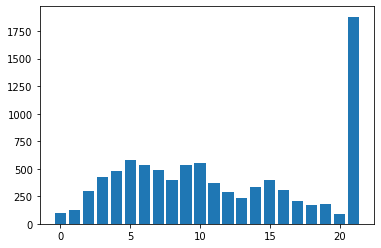

In [16]:
plt.bar(range(22), data)
plt.show()

#### People are mostly in their mid-career. However, we have to proceed with caution as "21" is actually 21+. 

In [17]:
target_df["experience"] = series
target_df

,gender,relevant experience,university,education level,major,experience,training hours,target
0,Male,No,None,Graduate,STEM,15,47,0
1,Male,Yes,None,Masters,STEM,21,8,0
2,Male,Yes,None,Graduate,STEM,13,18,1
3,Male,Yes,None,Graduate,STEM,7,46,1
4,Male,Yes,None,Graduate,STEM,5,108,0
...,...,...,...,...,...,...,...,...
8950,Male,No,Full time,Graduate,STEM,1,52,1
8951,Male,Yes,None,Masters,STEM,9,36,1
8952,Female,Yes,None,Graduate,STEM,10,23,0
8953,Female,Yes,None,Graduate,Humanities,7,25,0


### 9. Let's group by each column to see the average data value

In [18]:
target = target_df.groupby("target").mean()
target = target.reset_index()
target["target"] = target["target"].apply(str)
target

,target,experience,training hours
0,0,12.214668,65.415016
1,1,8.718139,63.361430


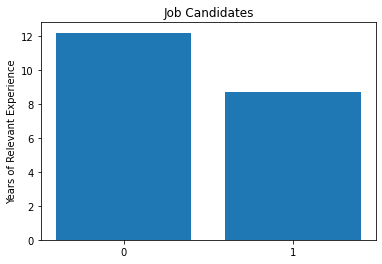

In [19]:
plt.bar(target["target"], target.experience)
plt.ylabel("Years of Relevant Experience")
plt.title("Job Candidates")
plt.show()

#### Those with less experience tend to look for jobs more than those who don't.

In [20]:
target_df.groupby("university").mean()

,experience,training hours,target
university,,,
Full time,7.105769,67.471154,0.278846
None,12.323545,64.784962,0.153937
Part time,8.884688,65.468809,0.155009


In [21]:
gender = target_df.groupby("gender").mean()
gender

,experience,training hours,target
gender,,,
Female,9.856965,67.002488,0.162935
Male,11.813700,64.959866,0.165985
Other,11.538462,57.115385,0.153846


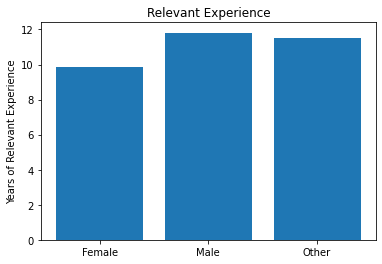

In [22]:
plt.bar(gender.index, gender.experience)
plt.ylabel("Years of Relevant Experience")
plt.title("Relevant Experience")
plt.show()

#### Females tend to have a bit less experience than males. It is possible that females took more training hours to compensate for lack of experience.

In [23]:
experience = target_df.groupby("relevant experience")["training hours"].mean()
experience

relevant experience
No     62.250906
Yes    65.472042
Name: training hours, dtype: float64

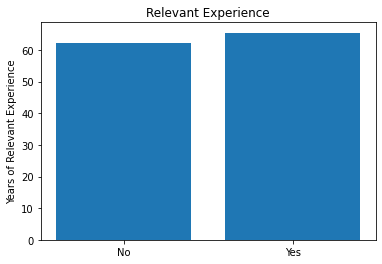

In [24]:
plt.bar(experience.index, experience)
plt.ylabel("Years of Relevant Experience")
plt.title("Relevant Experience")
plt.show()

#### Those who have relevant experience tend to have accumulated more training hours, thought there isn't a significant difference.

In [25]:
education = target_df.groupby("education level").mean()
education

,experience,training hours,target
education level,,,
Graduate,10.985765,65.653391,0.174664
Masters,12.792977,63.294406,0.145774
Phd,16.472441,68.003937,0.133858


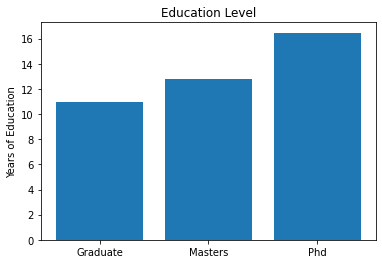

In [26]:
plt.bar(education.index, education["experience"])
plt.ylabel("Years of Education")
plt.title("Education Level")
plt.show()

#### Those who have higher education tend to have more experience and training hours. They are also less likely to find jobs.